
#Superstore data analysis
1)      Read the data set Superstore.xlsx
2)      Check the data type of columns
3)      check category wise  sub category wise profit.

4)      Find out the record for the month of jun-2014
5)      Calculate month wise average of profit.

6)      Create the new data frame for California

7)      Find sum of sales 
8)      Find state wise sum of sales.
9)      Find month wise sum  of sales
10)   Find country wise and city wise average profit
11)   Calculate region wise average profit.
12)   Find the ship mode which is more profitable.
13)   Create a new data frame where loss is recorded
14)   Find category wise sub category wise sales
15)    Create a data frame for record where discount is 0

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import random
import os
import warnings
warnings.filterwarnings('ignore')

###1)Read the data set Superstore.xlsx

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data science symboisis/Superstore.xls')

In [ ]:
data.shape

(9994, 21)

###2)Check the data type of columns

In [ ]:
data.dtypes

no                      float64
order _id                object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [ ]:
data.describe()

,no,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4998.000000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2884.874954,32063.693350,623.245101,2.225110,0.206452,234.260108
min,2.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2500.000000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4998.000000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7496.000000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data.head(15)

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,NaN,NaN,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [ ]:
data.tail(25)

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9969,9970.0,CA-2017-153871,2017-12-11,2017-12-17,Standard Class,RB-19435,Richard Bierner,Consumer,United States,Plainfield,...,7060,East,OFF-AP-10003622,Office Supplies,Appliances,"Bravo II Megaboss 12-Amp Hard Body Upright, Re...",22.750,7,0.0,6.5975
9970,9971.0,CA-2015-103772,2015-06-28,2015-07-02,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,...,30080,South,OFF-BI-10002867,Office Supplies,Binders,GBC Recycled Regency Composition Covers,119.560,2,0.0,54.9976
9971,9972.0,CA-2015-103772,2015-06-28,2015-07-02,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,...,30080,South,OFF-AR-10000538,Office Supplies,Art,"Boston Model 1800 Electric Pencil Sharpener, Gray",140.750,5,0.0,42.2250
9972,9973.0,CA-2016-130225,2016-09-11,2016-09-17,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Houston,...,77041,Central,OFF-EN-10000056,Office Supplies,Envelopes,Cameo Buff Policy Envelopes,99.568,2,0.2,33.6042
9973,9974.0,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,TEC-PH-10004080,Technology,Phones,Avaya 5410 Digital phone,271.960,5,0.2,27.1960
9974,9975.0,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-AR-10004752,Office Supplies,Art,Blackstonian Pencils,18.690,7,0.0,5.2332
9975,9976.0,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.360,2,0.0,6.4128
9976,9977.0,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.584,2,0.2,31.1980
9977,9978.0,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.860,7,0.0,0.0000
9978,9979.0,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.376,4,0.2,4.6816


###3)check category wise  sub category wise profit.

In [ ]:
data.groupby(['Category','Sub-Category'])['Profit'].mean()

Category         Sub-Category
Furniture        Bookcases       -15.230509
                 Chairs           43.095894
                 Furnishings      13.645918
                 Tables          -55.565771
Office Supplies  Appliances       38.922758
                 Art               8.200737
                 Binders          19.843574
                 Envelopes        27.418019
                 Fasteners         4.375660
                 Labels           15.236962
                 Paper            24.856620
                 Storage          25.152277
                 Supplies         -6.258418
Technology       Accessories      54.111788
                 Copiers         817.909190
                 Machines         29.432669
                 Phones           50.073938
Name: Profit, dtype: float64

Text(0.5, 1.0, 'category and subcategorywise data')

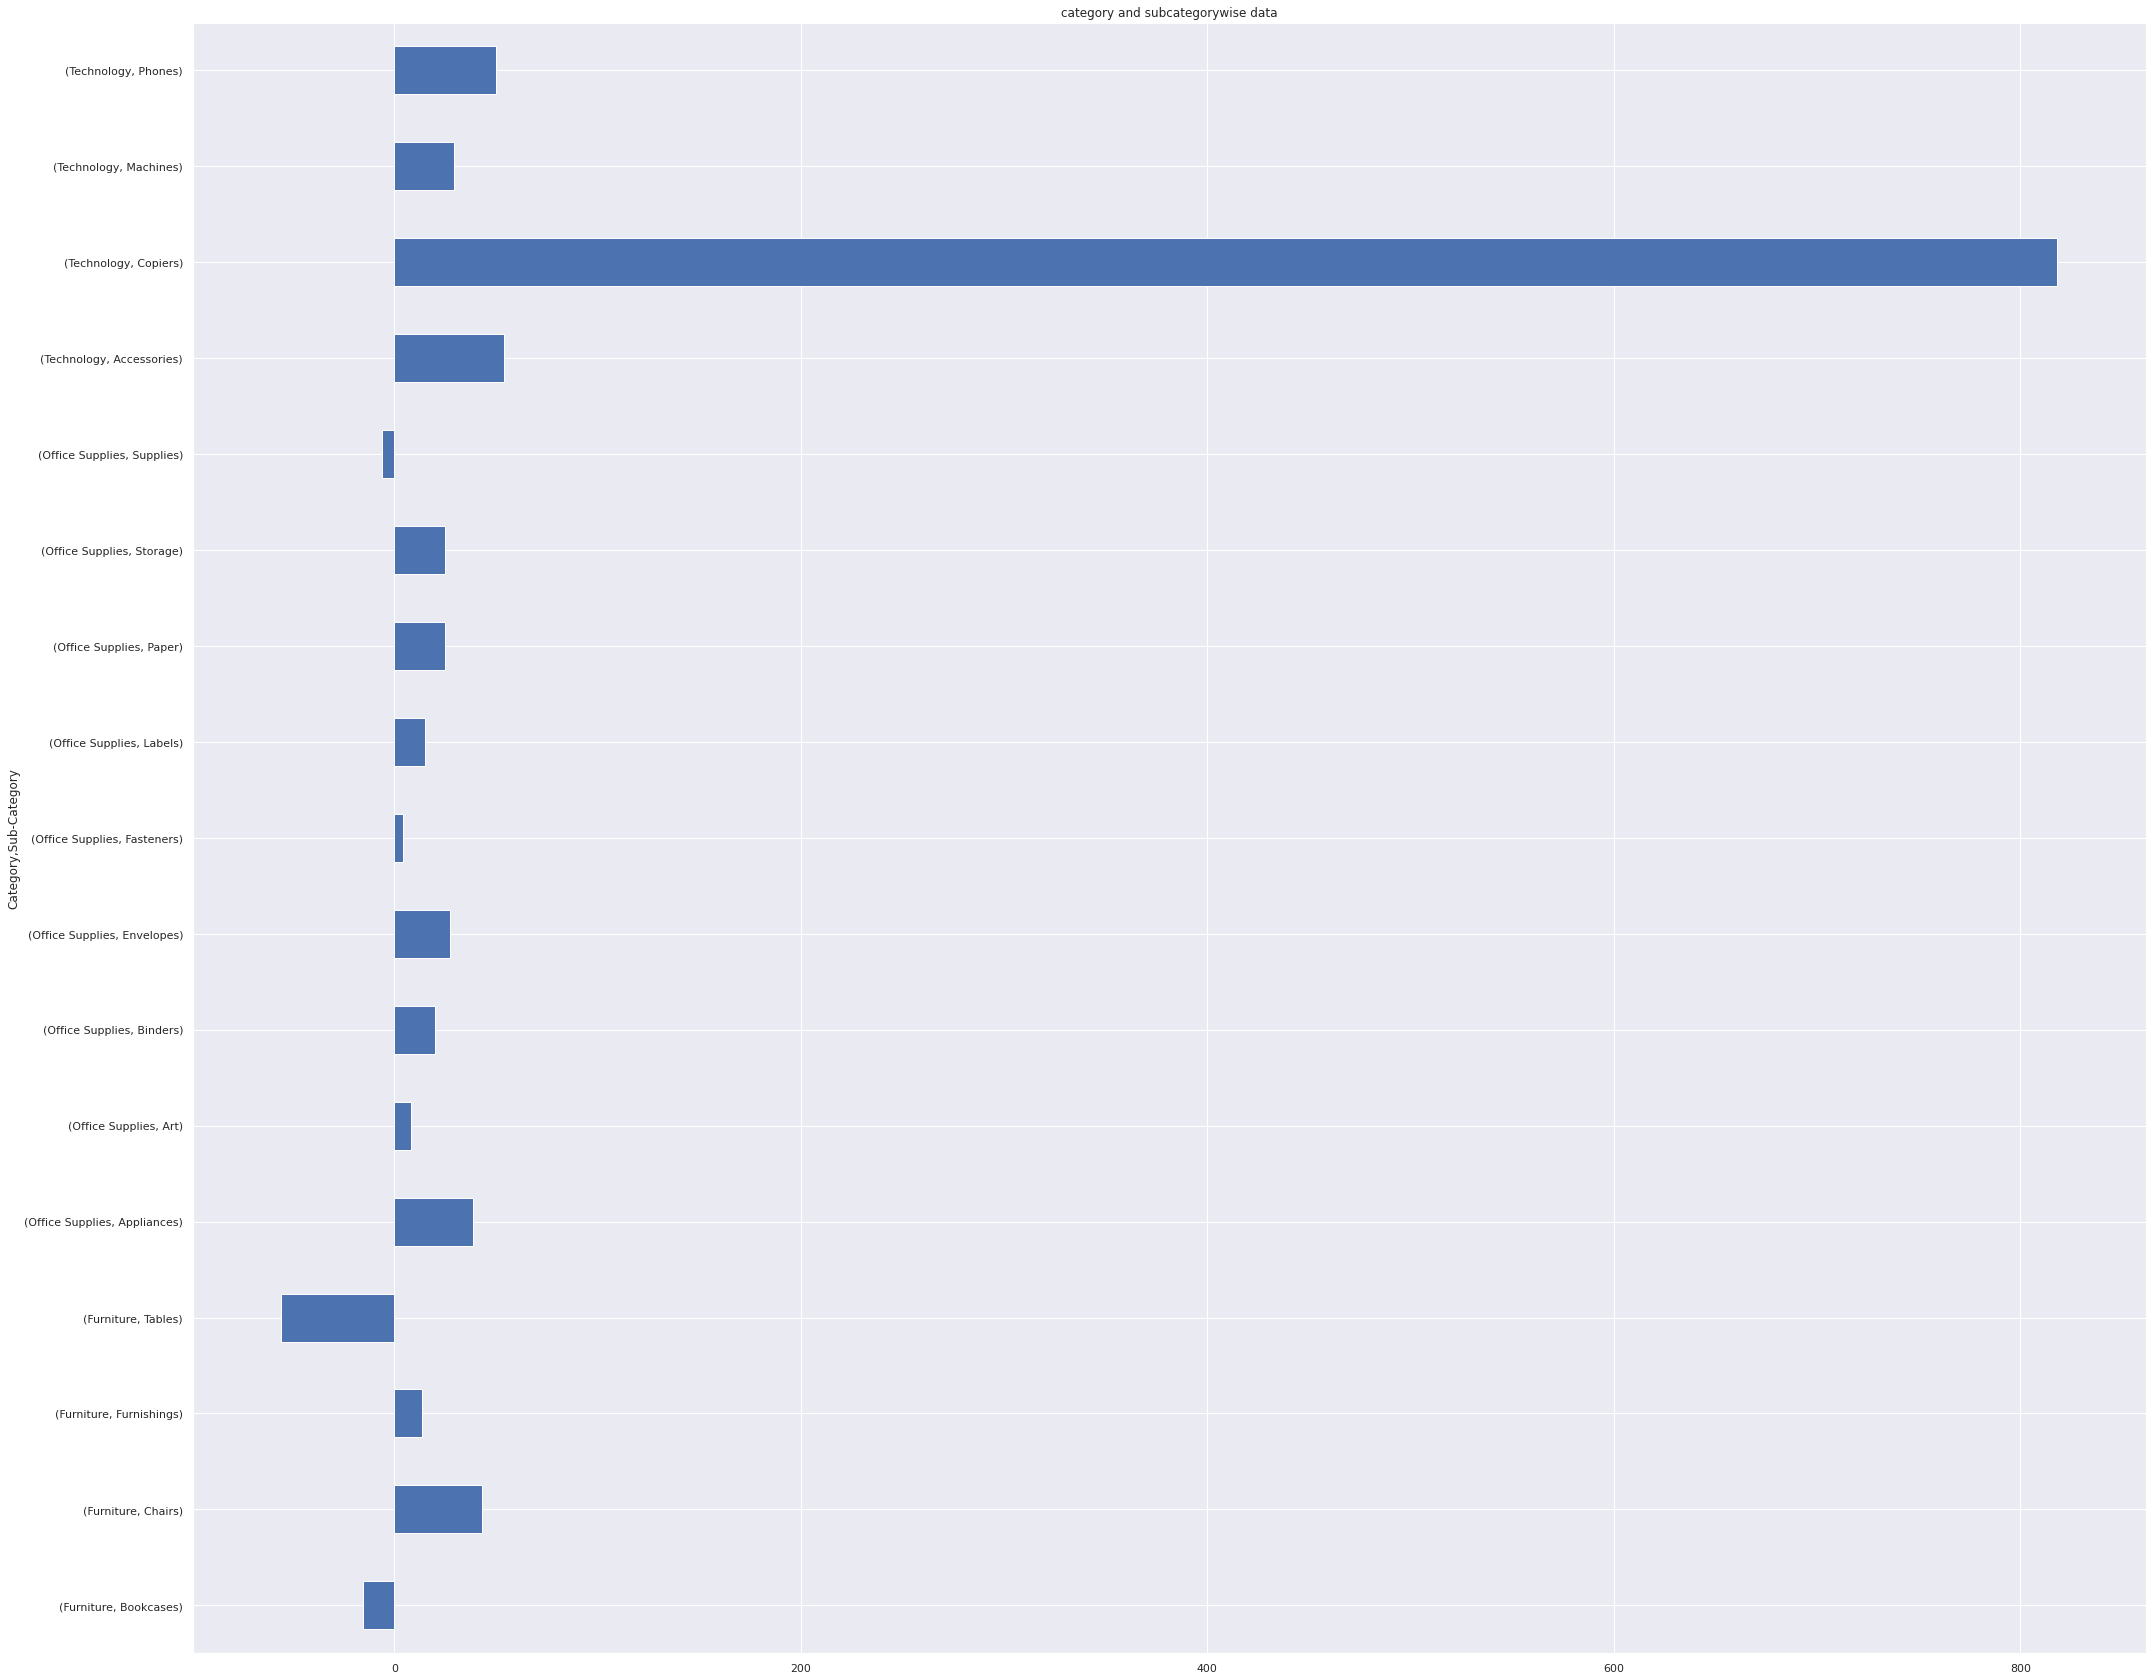

In [ ]:
plt.figure(figsize=(35,30))
data.groupby(['Category','Sub-Category'])['Profit'].mean().plot(kind='barh')
plt.title('category and subcategorywise data')

In [ ]:
#4)Find out the record for the month of jun-2014


#data(['Order Date'] is )
filtered_data = data.loc[(data['Order Date'] >= '2014-06-01')
                     & (data['Order Date'] < '2014-07-01')]

###5)Calculate month wise average of profit.

In [ ]:
#unable to filter the data according monthwise

In [ ]:
data.shape

(9994, 21)

In [ ]:
pd.options.display.max_columns=22 #for creating buffer to display all columns

In [ ]:
filtered_data

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5,6.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,9765.0,CA-2014-123855,2014-06-18,2014-06-23,Standard Class,MC-18100,Mick Crebagga,Consumer,United States,Los Angeles,California,90036,West,TEC-PH-10000215,Technology,Phones,Plantronics Cordless Phone Headset with In-lin...,139.800,5,0.2,12.2325
9843,9844.0,CA-2014-163867,2014-06-03,2014-06-06,First Class,RE-19450,Richard Eichhorn,Consumer,United States,Decatur,Illinois,62521,Central,OFF-LA-10001771,Office Supplies,Labels,Avery 513,15.936,4,0.2,5.1792
9844,9845.0,CA-2014-163867,2014-06-03,2014-06-06,First Class,RE-19450,Richard Eichhorn,Consumer,United States,Decatur,Illinois,62521,Central,FUR-FU-10001475,Furniture,Furnishings,"Contract Clock, 14"", Brown",61.544,7,0.6,-40.0036
9845,9846.0,CA-2014-163867,2014-06-03,2014-06-06,First Class,RE-19450,Richard Eichhorn,Consumer,United States,Decatur,Illinois,62521,Central,OFF-ST-10000877,Office Supplies,Storage,Recycled Steel Personal File for Standard File...,132.696,3,0.2,9.9522


In [ ]:
#5)Calculate month wise average of profit.
data.groupby(['Order Date'])['Profit'].mean()

Order Date
2014-01-03      5.551200
2014-01-04    -21.996700
2014-01-05      4.884000
2014-01-06    150.894711
2014-01-07    -35.981050
                 ...    
2017-12-26     15.280050
2017-12-27    -15.987100
2017-12-28     13.322042
2017-12-29     53.702817
2017-12-30     14.505214
Name: Profit, Length: 1237, dtype: float64

In [ ]:
data['Order Date'].value_counts()

2016-09-05    38
2017-09-02    36
2016-11-10    35
2017-12-01    34
2017-12-02    34
              ..
2016-02-25     1
2016-10-25     1
2014-02-21     1
2016-10-18     1
2014-01-21     1
Name: Order Date, Length: 1237, dtype: int64

In [ ]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

###6)Create the new data frame for California



In [ ]:
new_dataframe=data[data['State']=='California']

In [ ]:
new_dataframe

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
5,6.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987.0,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9990,9991.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


###7)Find sum of sales 


In [ ]:
data['Sales'].sum()

2297200.8603000003

###8) Find state wise sum of sales.

In [ ]:
data.groupby(['State'])['Sales'].sum()

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

#10)Find country wise and city wise average profit

In [ ]:
data.groupby(['Country','City'])['Profit'].mean()

Country        City       
United States  Aberdeen         6.630000
               Abilene         -3.758400
               Akron           -8.887410
               Albuquerque     45.292007
               Alexandria      19.913644
                                 ...    
               Woonsocket      19.669775
               Yonkers        184.517047
               York           -20.433840
               Yucaipa         13.208000
               Yuma          -116.497725
Name: Profit, Length: 531, dtype: float64

###11)Calculate region wise average profit.

In [ ]:
data.groupby(['Region'])['Profit'].mean()


Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
Name: Profit, dtype: float64

###12)Find the ship mode which is more profitable.

In [ ]:
data.groupby(['Ship Mode'])['Profit'].mean()

Ship Mode
First Class       31.839948
Same Day          29.266591
Second Class      29.535545
Standard Class    27.494770
Name: Profit, dtype: float64

###13)Create a new data frame where loss is recorded

In [ ]:
data[data['Profit']<0]

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15.0,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16.0,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24.0,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28.0,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,9921.0,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,Texas,77803,Central,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,-35.8176
9921,9922.0,CA-2014-111360,2014-11-24,2014-11-30,Standard Class,AT-10435,Alyssa Tate,Home Office,United States,Akron,Ohio,44312,East,OFF-BI-10003350,Office Supplies,Binders,Acco Expandable Hanging Binders,5.7420,3,0.70,-4.5936
9931,9932.0,CA-2015-104948,2015-11-13,2015-11-17,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,California,92404,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960
9937,9938.0,CA-2016-164889,2016-06-03,2016-06-06,Second Class,CP-12340,Christine Phan,Corporate,United States,Los Angeles,California,90049,West,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2,0.20,-1.7772


###14)Find category wise sub category wise sales

In [ ]:
data.groupby(['Category','Sub-Category'])['Sales'].mean()

Category         Sub-Category
Furniture        Bookcases        503.859633
                 Chairs           532.332420
                 Furnishings       95.825668
                 Tables           648.794771
Office Supplies  Appliances       230.755710
                 Art               34.068834
                 Binders          133.560560
                 Envelopes         64.867724
                 Fasteners         13.936774
                 Labels            34.303055
                 Paper             57.284092
                 Storage          264.590553
                 Supplies         245.650200
Technology       Accessories      215.974604
                 Copiers         2198.941618
                 Machines        1645.553313
                 Phones           371.211534
Name: Sales, dtype: float64

###15)Create a data frame for record where discount is 0

In [ ]:
data[data['Discount']==0]

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,NaN,NaN,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714
5,6.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,0.0,14.1694
6,7.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28,4,0.0,1.9656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,9988.0,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.99,1,0.0,28.7964
9988,9989.0,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.10,5,0.0,55.6470
9990,9991.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.0,15.6332
9992,9993.0,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.0,13.3200
